In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv') #import Spotify data as dataframe
df['rank'] = range(len(df))
list(df) #get a list of headers

['id',
 'name',
 'artists',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'rank']

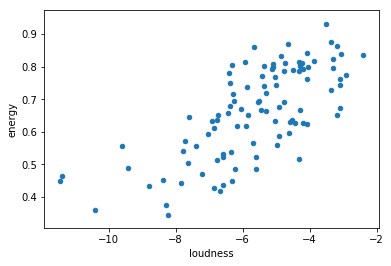

In [2]:
#Sample plot
#danceability vs. energy
df.plot(kind='scatter', x='loudness', y='energy')
plt.show()

In [4]:
#truncate to quantitative data
df_truncated = df[['rank',
                   'danceability',
                   'energy',
                   'loudness',
                   'speechiness',
                   'acousticness',
                   'liveness',
                   'valence',
                   'tempo',
                   'duration_ms']]

In [5]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components=1, whiten=True)

std_scale = preprocessing.StandardScaler().fit(df_truncated)
df_truncated_scaled = std_scale.transform(df_truncated)

pca_reduced = pca.fit_transform(df_truncated_scaled)

print(pca.explained_variance_ratio_)
print(pca.components_)

df['pca'] = pca_reduced

[ 0.23257649]
[[ 0.13915738 -0.1892514  -0.48519492 -0.56736708  0.31927737  0.06140833
  -0.0690959  -0.45559324  0.23450028  0.12025295]]


In [6]:
list(df_truncated) #get a list of headers

['rank',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

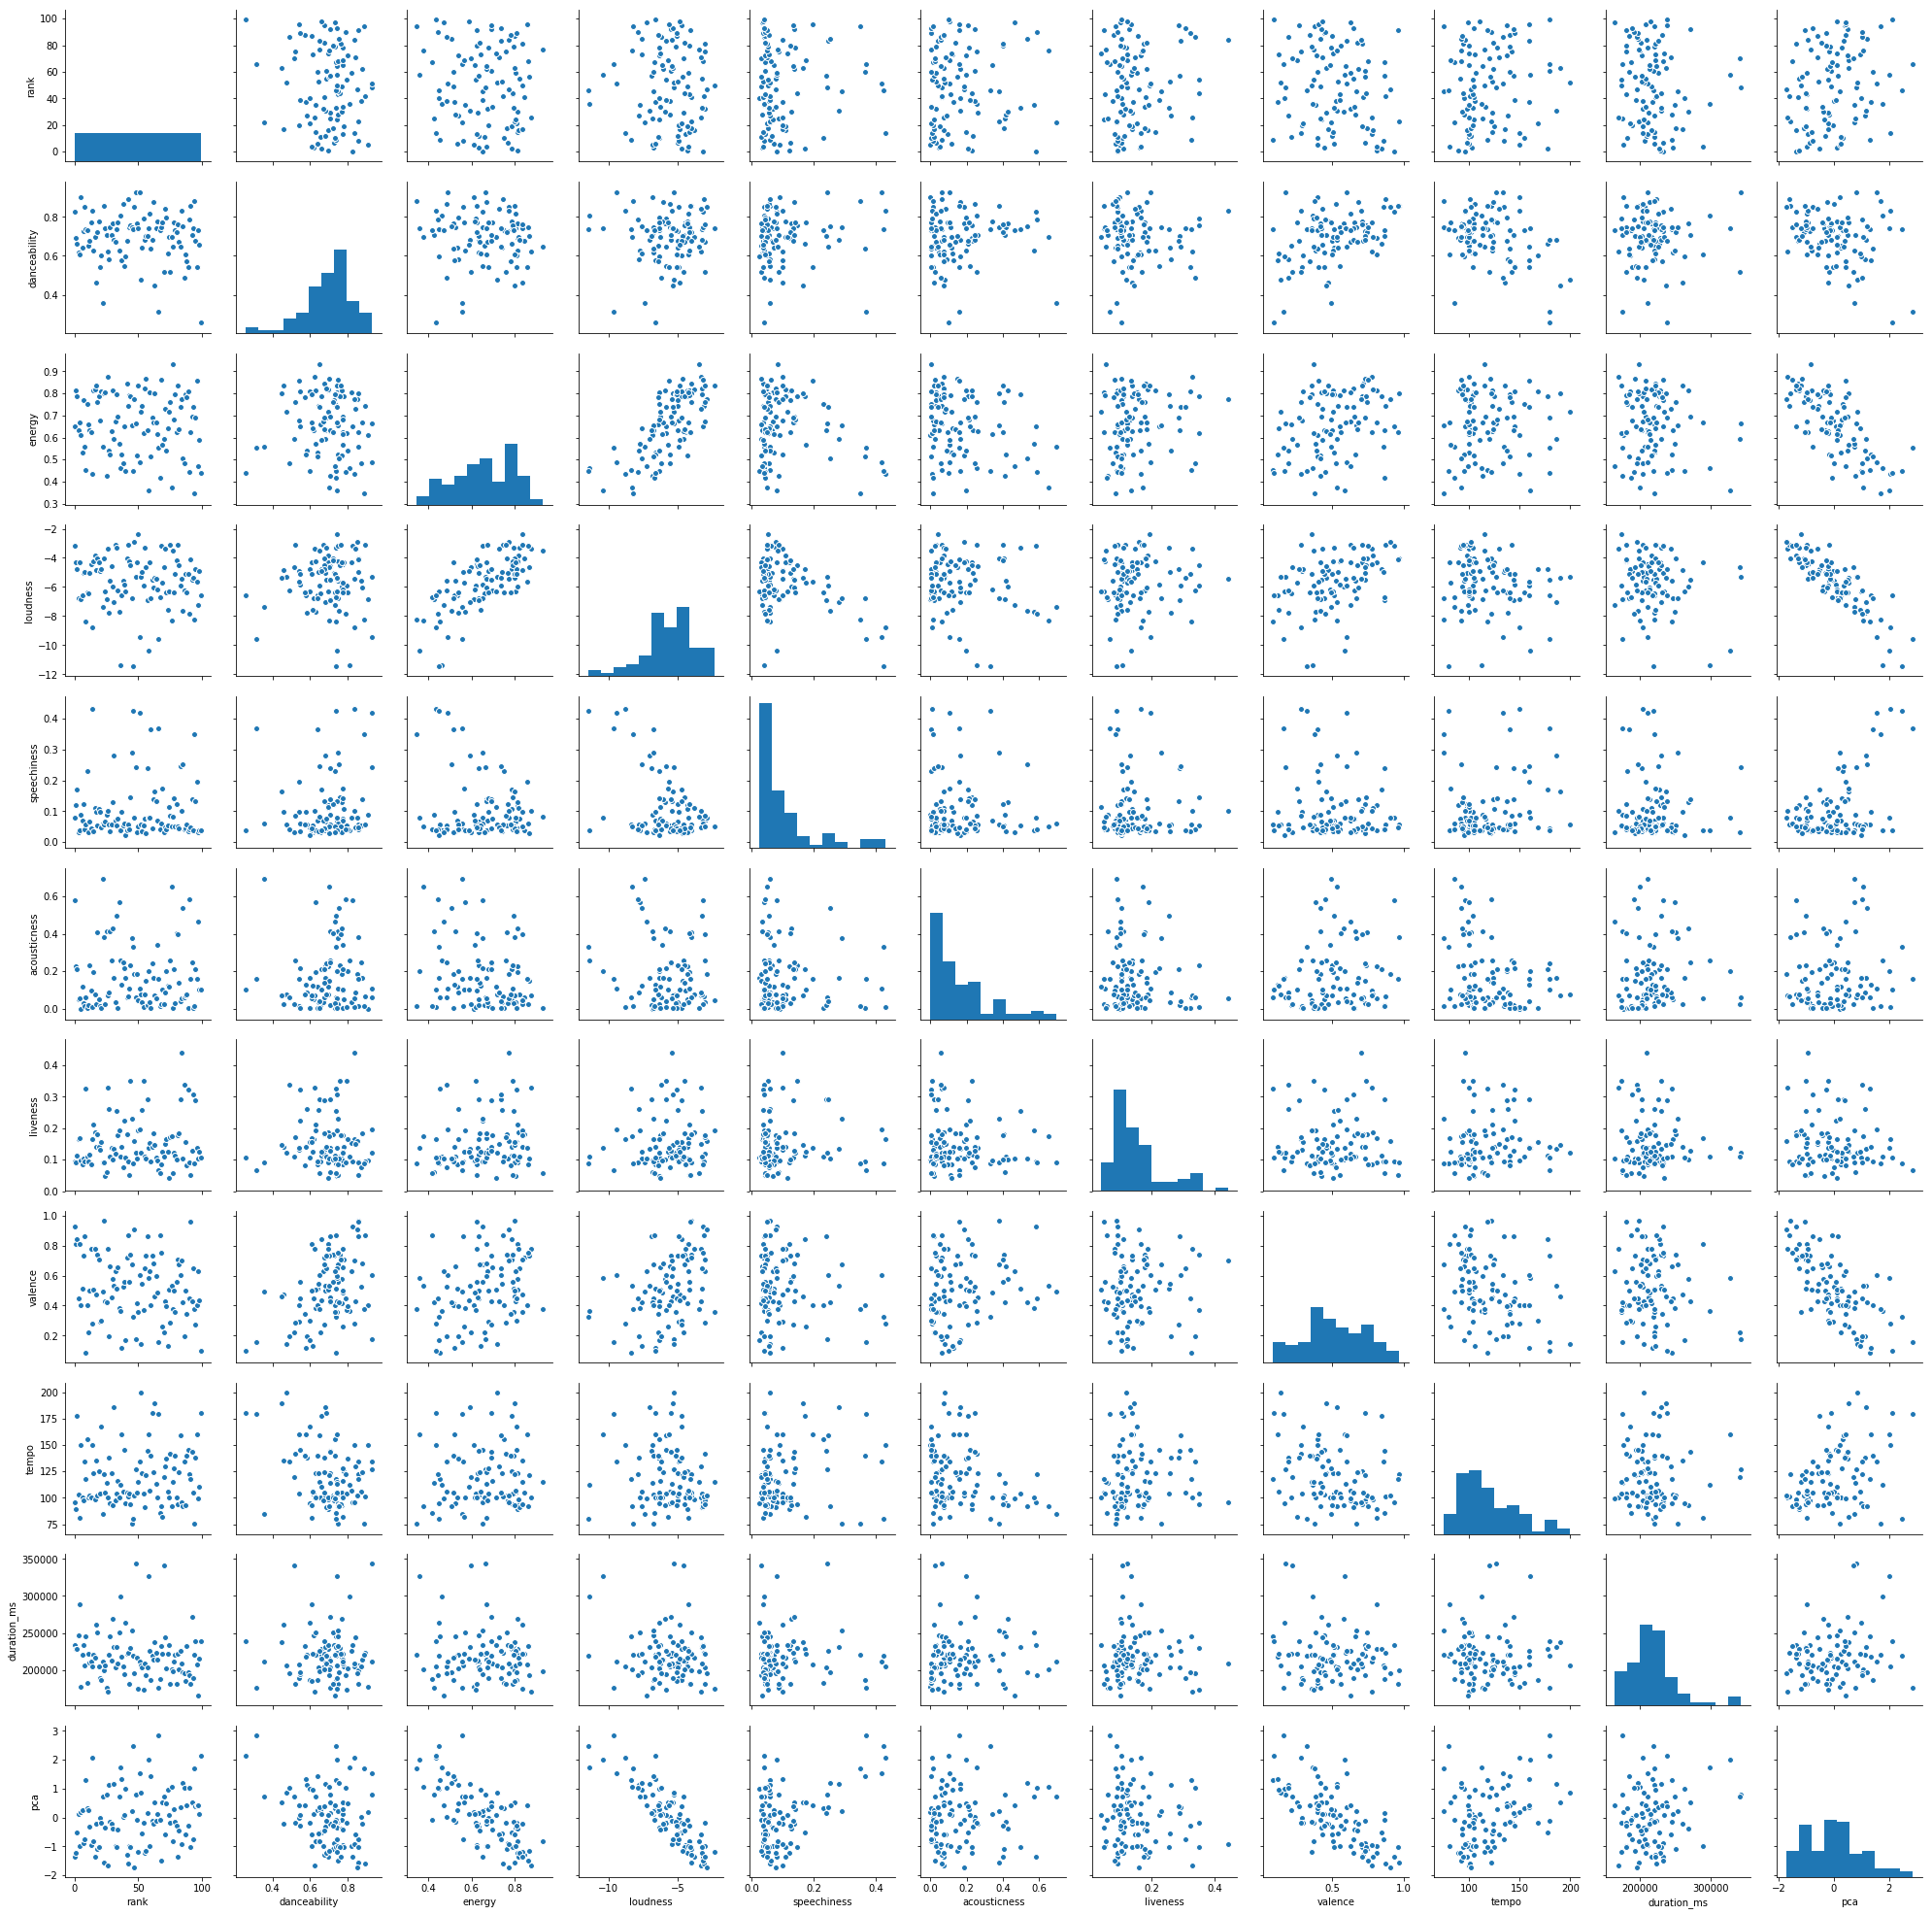

In [7]:
#truncate to quantitative data
df_truncated_pairplot = df[['rank',
                   'danceability',
                   'energy',
                   'loudness',
                   'speechiness',
                   'acousticness',
                   'liveness',
                   'valence',
                   'tempo',
                   'duration_ms',
                   'pca']]
g = sns.pairplot(df_truncated_pairplot)
plt.show()

In [8]:
#Make JSON file out of the provided dataframe
import json

#given three column names
#make a JSON that contains:
#rank, song name, song title, args
def makeJSON(headers):
    column_headers = list(df)
    for arg in headers:
        if (arg not in column_headers):
            return 'Error: specified argument not found as column header'
    
    df_selected_headers = df[['rank','name','artists'] + headers].copy()
    jsonified = df_selected_headers.to_json(orient='records')
    
    textfile = open('sampleJSON.json', 'w')
    textfile.write(jsonified)
    textfile.close()
    
    return jsonified


makeJSON(['energy', 'loudness', 'speechiness']);
# print(sampleJSON)

In [9]:
#Isolation detection of outliers given certain headers
from sklearn.neighbors import LocalOutlierFactor

def getOutliersFromHeaders(headers):
    column_headers = list(df)
    for arg in headers:
        if (arg not in column_headers):
            return 'Error: specified argument not found as column header'
    
    df_selected_headers = df[headers].copy()
    
    #scale data for better results
    std_scale = preprocessing.StandardScaler().fit(df_selected_headers)
    df_selected_headers_scaled = std_scale.transform(df_selected_headers)

    lof = LocalOutlierFactor()
    lof_score = lof.fit_predict(df_selected_headers_scaled)
    lof_score = ((lof_score*-1 + 1) != 0)

    for i in range(len(lof_score)):
        if (lof_score[i]):
            print(df['name'][i])
            
            
getOutliersFromHeaders(['danceability','acousticness'])

Shape of You
HUMBLE.
Castle on the Hill
Say You Won't Let Go
1-800-273-8255
Chained To The Rhythm
How Far I'll Go - From "Moana"
Silence
Too Good At Goodbyes
Dusk Till Dawn - Radio Edit
